In [1]:
import json
import os
import pandas as pd
%matplotlib inline

In [2]:
with open('data/motion/20181026_0000.json', mode='r', encoding='utf-8') as file:
    data = file.read()
    json_data = json.loads(data)  

In [3]:
movement_data = json_data['data']
# [row['event'].pop('metadata', None) for row in movement_data];

In [4]:
[row.update({'origin':row['event']['variable'][row['event']['variable'].find('-') + 1:row['event']['variable'].find('.')],
             'measurement':row['event']['variable'][row['event']['variable'].find('.') + 1:]
            }) for row in movement_data];
[row['event'].pop('variable', None) for row in movement_data];

In [5]:
salt_acceleration = [row for row in movement_data if row['origin'] == 'SALT' and row['measurement'] == 'acceleration']

In [6]:
len(movement_data)

726101

In [7]:
len(salt_acceleration)

179693

In [8]:
salt_acceleration[:1]

[{'timestamp': 1540512000009,
  'event': {'content': [0.9909217357635498,
    0.050634101033210754,
    0.050106193870306015,
    967317838125],
   'metadata': {'validity': True, 'timestamp': 1540512000005}},
  'origin': 'SALT',
  'measurement': 'acceleration'}]

In [9]:
x_cor = [row['event']['content'][0] for row in salt_acceleration]
y_cor = [row['event']['content'][1] for row in salt_acceleration]
z_cor = [row['event']['content'][2] for row in salt_acceleration]

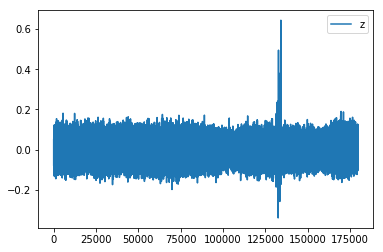

In [10]:
df = pd.DataFrame({'z':z_cor})
df.plot()